# Ports Category Classifier

# step-1 Importing the Libraries

In [42]:
# for numerical computation and array manipulations
import numpy as np

# for dataframe and series manipulations with the dataset
import pandas as pd
from sklearn.model_selection import train_test_split

# for data viaualization
import matplotlib.pyplot as plt
import seaborn as sns

# for creating instances of machine Leanrinig algorithm
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.ensemble import RandomForestClassifier

# for data preprocessing purposes
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

# for performance metrics analysis
from sklearn.metrics import accuracy_score , confusion_matrix

# Step-2 Importing the Datasets

In [43]:
data_1 = pd.read_excel("Major_vs_Minor_1.xlsx")
data_2 = pd.read_excel("Major_vs_Minor_2.xlsx")

# step-3 Exploratoty Data Analysis (Numerical)

In [44]:
# finding the shape of the datasets

print("shape of the dataset 1:",data_1.shape)
print("shape of the dataset 2:",data_2.shape)

shape of the dataset 1: (66, 8)
shape of the dataset 2: (254, 8)


In [45]:
# exploring the header sections present in the dataset

print("Header Section of the dataset 1")
print(data_1.head())
print("\n")
print("Header Section of the dataset 2")
print(data_2.head())

Header Section of the dataset 1
  Port Locode       Port Published Port Locode Published Port  \
0       GBABD   Aberdeen                 GBABD       Aberdeen   
1         NaN        NaN                   NaN            NaN   
2       GBBRS    Bristol                 GBBRS        Bristol   
3       GBAVO  Avonmouth                 GBBRS        Bristol   
4       GBPRU   Portbury                 GBBRS        Bristol   

  Country of the UK Is the Published Port Major or Minor Published Port Lat  \
0          Scotland                                Major          57.143609   
1               NaN                                  NaN                      
2           England                                Major          51.448193   
3           England                                Major          51.448193   
4           England                                Major          51.448193   

  Published Port Long  
0           -2.063487  
1                      
2           -2.603593  
3     

In [46]:
# finding the description and information about the datasets

print("Statistical information about the dataset 1")
print(data_1.info())

print("Statistical information about the dataset 2")
print(data_2.info())

Statistical information about the dataset 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Port Locode                           65 non-null     object
 1   Port                                  65 non-null     object
 2   Published Port Locode                 65 non-null     object
 3   Published Port                        65 non-null     object
 4   Country of the UK                     65 non-null     object
 5   Is the Published Port Major or Minor  65 non-null     object
 6   Published Port Lat                    66 non-null     object
 7   Published Port Long                   66 non-null     object
dtypes: object(8)
memory usage: 4.3+ KB
None
Statistical information about the dataset 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 

In [47]:
# finding the Missing values or the presence of the missing values in the dataset

# for dataset 1
print(data_1.isna().any())
print("\n")
# for dataset2
print(data_2.isna().any())

Port Locode                              True
Port                                     True
Published Port Locode                    True
Published Port                           True
Country of the UK                        True
Is the Published Port Major or Minor     True
Published Port Lat                      False
Published Port Long                     False
dtype: bool


Port Locode                             True
Port                                    True
Published Port Locode                   True
Published Port                          True
Country of the UK                       True
Is the Published Port Major or Minor    True
Published Port Lat                      True
Published Port Long                     True
dtype: bool


# Step-4 Data Pre-processing

In [152]:
# step-4.1 combining the dataset 1 and dataset 2 into a single dataset

dataset = pd.concat([data_1 , data_2] , ignore_index = True)

In [153]:
# step-4.2 segregate the input as well as the output feature columns

y = dataset["Is the Published Port Major or Minor"]
x = dataset.drop(["Is the Published Port Major or Minor"] , axis = 1)

In [154]:
# step-4.4 label_Encoding at the output feature column

le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y)

In [155]:
# step-4.5 data preprocessing at the input feature columns

x = x.drop(1)
y = y.drop(1)

In [156]:
feature_columns = x.columns

for i in feature_columns:
    print(x[i].isna())

0      False
2      False
3      False
4      False
5      False
       ...  
315    False
316    False
317    False
318    False
319    False
Name: Port Locode, Length: 319, dtype: bool
0      False
2      False
3      False
4      False
5      False
       ...  
315    False
316    False
317    False
318    False
319    False
Name: Port, Length: 319, dtype: bool
0      False
2      False
3      False
4      False
5      False
       ...  
315    False
316    False
317    False
318    False
319    False
Name: Published Port Locode, Length: 319, dtype: bool
0      False
2      False
3      False
4      False
5      False
       ...  
315    False
316    False
317    False
318    False
319    False
Name: Published Port, Length: 319, dtype: bool
0      False
2      False
3      False
4      False
5      False
       ...  
315    False
316    False
317    False
318    False
319    False
Name: Country of the UK, Length: 319, dtype: bool
0      False
2      False
3      False
4      False
5

In [157]:
x.head()

,Port Locode,Port,Published Port Locode,Published Port,Country of the UK,Published Port Lat,Published Port Long
0,GBABD,Aberdeen,GBABD,Aberdeen,Scotland,57.143609,-2.063487
2,GBBRS,Bristol,GBBRS,Bristol,England,51.448193,-2.603593
3,GBAVO,Avonmouth,GBBRS,Bristol,England,51.448193,-2.603593
4,GBPRU,Portbury,GBBRS,Bristol,England,51.448193,-2.603593
5,GBPTH,Portishead,GBBRS,Bristol,England,51.448193,-2.603593


In [158]:
list_of_categorical_columns = ['Port Locode', 'Port', 'Published Port Locode', 'Published Port',
       'Country of the UK']

for i in list_of_categorical_columns:
    le1 = LabelEncoder()
    x[i] = le1.fit_transform(x[i])
    
print(x.head())

   Port Locode  Port  Published Port Locode  Published Port  \
0           28     0                      4               0   
2           49    21                      6               3   
3           32     5                      6               3   
4          180   165                      6               3   
5          182   167                      6               3   

   Country of the UK Published Port Lat Published Port Long  
0                  2          57.143609           -2.063487  
2                  0          51.448193           -2.603593  
3                  0          51.448193           -2.603593  
4                  0          51.448193           -2.603593  
5                  0          51.448193           -2.603593  


In [159]:
mean_value_1 = 51.448193
mean_value_2 = -2.603593

In [160]:
x["Published Port Lat"] = x["Published Port Lat"].fillna(mean_value_1 , axis = 0)
print(x["Published Port Lat"].head())

0    57.143609
2    51.448193
3    51.448193
4    51.448193
5    51.448193
Name: Published Port Lat, dtype: object


In [161]:
x["Published Port Long"] = x["Published Port Long"].fillna(mean_value_2 , axis = 0)
print(x["Published Port Long"].head())

0   -2.063487
2   -2.603593
3   -2.603593
4   -2.603593
5   -2.603593
Name: Published Port Long, dtype: object


In [162]:
print(x["Published Port Long"].isna().any())
print(x["Published Port Lat"].isna().any())

False
False


In [174]:
column_1 = pd.DataFrame(x["Published Port Long"])
x["Published Port Long"] = column_1.applymap(lambda i:-2.603593 if i == '' else i)

column_2 = pd.DataFrame(x["Published Port Lat"])
x["Published Port Lat"] = column_2.applymap(lambda i: 51.448193 if i == '' else i)

x = x.drop(["Published Port Lat"] , axis = 1)

In [175]:
# step-4.6 splitting the training and testing data

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1 , random_state = 42)

In [176]:
print(x_train.head(150))

     Port Locode  Port  Published Port Locode  Published Port  \
168          150   127                     37              29   
261          132   115                     50              51   
300          178   170                     28              23   
78             3    46                     13               5   
176          195   187                     37              29   
..           ...   ...                    ...             ...   
66            28     0                      4               0   
224          246   245                     27              37   
86           135   114                     13               5   
241          157   137                      0              43   
160          134   122                     31              27   

     Country of the UK  Published Port Long  
168                  0            -2.603593  
261                  2            -2.603593  
300                  0            -2.603593  
78                   2            -

In [177]:
print(y_train.head(150))

     0
168  0
261  0
300  1
78   0
176  0
..  ..
66   0
224  0
86   0
241  0
160  0

[150 rows x 1 columns]


# Step-5 Exploratory Data Analysis (Graphical)

# Visualization-1 Scatterplot for the Whole Dataset

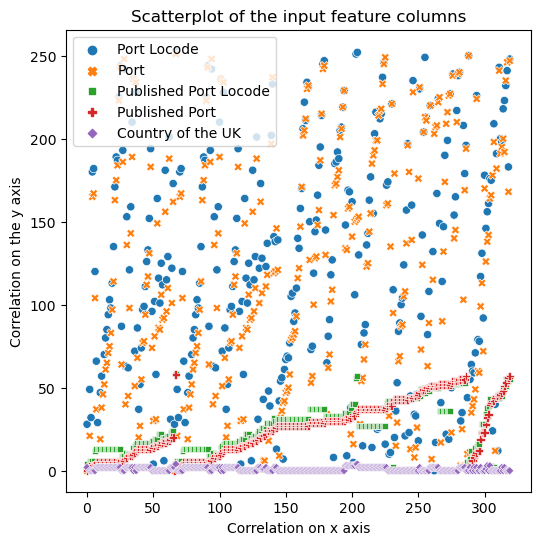

In [110]:
plt.figure(figsize = (6,6))
sns.scatterplot(x)
plt.title("Scatterplot of the input feature columns")
plt.xlabel("Correlation on x axis")
plt.ylabel("Correlation on the y axis")
plt.show()

# Visualization-2 Barplots regarding the types of Countries of the UK with respect to the published ports

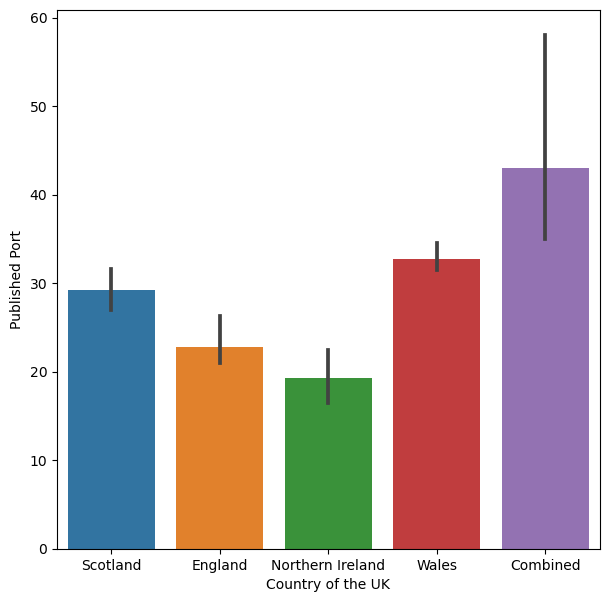

In [115]:
plt.figure(figsize = (7,7))
sns.barplot(x = x["Country of the UK"] ,y =  x["Published Port"])
plt.xticks([0,1,2,3,4] , ["Scotland" , "England" , "Northern Ireland" , "Wales" , "Combined"])
plt.show()

# Step-6 Machine Learning Approach

In [195]:
# checking the performance of RandomForest Classifier

acc_score_rfc = []
for i in range(1 , 10):
    rfc = RandomForestClassifier(n_estimators = i*10 , criterion = 'gini', min_samples_split = i*2, max_depth = i , random_state = 42)
    rfc.fit(x_train , y_train)
    y_pred_1 = rfc.predict(x_test)
    
    accy_score = accuracy_score(y_test , y_pred_1)
    acc_score_rfc.append(accy_score)
    
print(acc_score_rfc)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

[0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [197]:
# checking the accuracy_score of the Support vector machine Algorithm

acc_score_svc = []
kernel_list = ["linear" , "poly" , "rbf"]
for i in range(1 , 10):
    for j in kernel_list:
        svc = SVC(C = i, kernel = j , gamma = 'scale', random_state = 42)
        svc.fit(x_train , y_train)
        y_pred_2 = rfc.predict(x_test)

        accy_score = accuracy_score(y_test , y_pred_2)
        acc_score_svc.append(accy_score)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [199]:
print(acc_score_svc)

[0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]


In [193]:
# checking the performance of Logistic Regression

model_2 = LogisticRegression()
acc_scor = []
model_2.fit(x_train , y_train)
y_pred = model_2.predict(x_test)
y_pred = pd.DataFrame(y_pred)
acc_score = accuracy_score(y_test , y_pred)
acc_scor.append(acc_score)
print("accuracy score of the Logistic regression model: ",acc_score)
cm = confusion_matrix(y_test , y_pred)
print("confusion amtrix: \n", cm)

accuracy score of the Logistic regression model:  0.9375
confusion amtrix: 
 [[30  0]
 [ 2  0]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
acc_score_dtc = []
for i in range(1 , 10):
    dtc = DecisionTreeClassifier( criterion = 'gini', min_samples_split = i*2, max_depth = i , random_state = 42)
    dtc.fit(x_train , y_train)
    y_pred_3 = rfc.predict(x_test)
    
    accy_score = accuracy_score(y_test , y_pred_3)
    acc_score_dtc.append(accy_score)
    
print(acc_score_dtc)

[0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]


In [202]:
acc_score_NB = []

models = [GaussianNB()]
for i in models:
    i.fit(x_train , y_train)
    y_pred_4 = i.predict(x_test)
    
    accy_score = accuracy_score(y_test , y_pred_4)
    acc_score_NB.append(accy_score)
    
print(acc_score_NB)

[0.90625]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Step 7 Performance metrics analysis of ML Approach

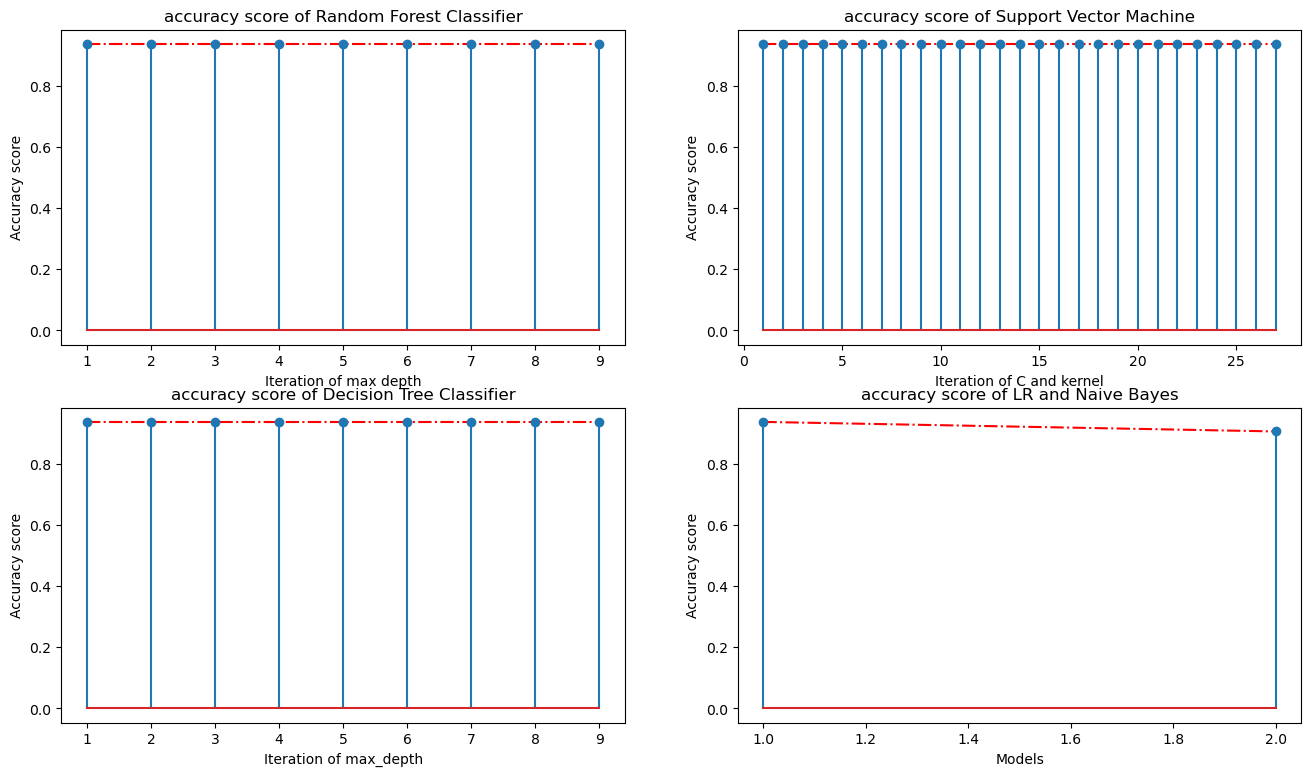

In [209]:
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
x_axis = np.linspace(1,9,9)
plt.plot(x_axis , acc_score_rfc, color = 'r', marker = '+', linestyle = '-.')
plt.stem(x_axis , acc_score_rfc)
plt.xlabel("Iteration of max depth")
plt.ylabel("Accuracy score")
plt.title("accuracy score of Random Forest Classifier")

plt.subplot(2,2,2)
x_axis = np.linspace(1,27,27)
plt.plot(x_axis , acc_score_svc, color = 'r', marker = '+', linestyle = '-.')
plt.stem(x_axis , acc_score_svc)
plt.xlabel("Iteration of C and kernel")
plt.ylabel("Accuracy score")
plt.title("accuracy score of Support Vector Machine")

plt.subplot(2,2,3)
x_axis = np.linspace(1,9,9)
plt.plot(x_axis , acc_score_dtc, color = 'r', marker = '+', linestyle = '-.')
plt.stem(x_axis , acc_score_dtc)
plt.xlabel("Iteration of max_depth")
plt.ylabel("Accuracy score")
plt.title("accuracy score of Decision Tree Classifier")

plt.subplot(2,2,4)
x_axis = np.linspace(1,2,2)
y_axis = [acc_scor,acc_score_NB]
plt.plot(x_axis , y_axis, color = 'r', marker = '+', linestyle = '-.')
plt.stem(x_axis , y_axis)
plt.xlabel("Models")
plt.ylabel("Accuracy score")
plt.title("accuracy score of LR and Naive Bayes")

plt.show()

# Step-8 Deep Learning Approach

# Sequential Model Structure

In [212]:
from keras.models import Sequential
from keras import Model
from keras.layers import Dense , Input

seq_model = Sequential()

seq_model.add(Dense(512 , input_dim = 6 , activation = 'relu'))
seq_model.add(Dense(256 , activation = 'relu'))
seq_model.add(Dense(128 , activation = 'relu'))

seq_model.add(Dense(2 , activation = 'relu'))

print(seq_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3584      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 168066 (656.51 KB)
Trainable params: 168066 (656.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [215]:
# compiling the model 

seq_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [218]:
model = seq_model.fit(x_train , y_train , epochs = 100 , verbose = 2 , validation_data = (x_test , y_test))

Epoch 1/100
9/9 - 0s - loss: 7.6347 - accuracy: 0.8885 - val_loss: 7.6301 - val_accuracy: 0.9375 - 109ms/epoch - 12ms/step
Epoch 2/100
9/9 - 0s - loss: 7.6347 - accuracy: 0.8885 - val_loss: 7.6301 - val_accuracy: 0.9375 - 71ms/epoch - 8ms/step
Epoch 3/100
9/9 - 0s - loss: 7.6347 - accuracy: 0.8885 - val_loss: 7.6301 - val_accuracy: 0.9375 - 68ms/epoch - 8ms/step
Epoch 4/100
9/9 - 0s - loss: 7.6347 - accuracy: 0.8885 - val_loss: 7.6301 - val_accuracy: 0.9375 - 83ms/epoch - 9ms/step
Epoch 5/100
9/9 - 0s - loss: 7.6347 - accuracy: 0.8885 - val_loss: 7.6301 - val_accuracy: 0.9375 - 68ms/epoch - 8ms/step
Epoch 6/100
9/9 - 0s - loss: 7.6347 - accuracy: 0.8885 - val_loss: 7.6301 - val_accuracy: 0.9375 - 84ms/epoch - 9ms/step
Epoch 7/100
9/9 - 0s - loss: 7.6347 - accuracy: 0.8885 - val_loss: 7.6301 - val_accuracy: 0.9375 - 67ms/epoch - 7ms/step
Epoch 8/100
9/9 - 0s - loss: 7.6347 - accuracy: 0.8885 - val_loss: 7.6301 - val_accuracy: 0.9375 - 68ms/epoch - 8ms/step
Epoch 9/100
9/9 - 0s - loss: 7

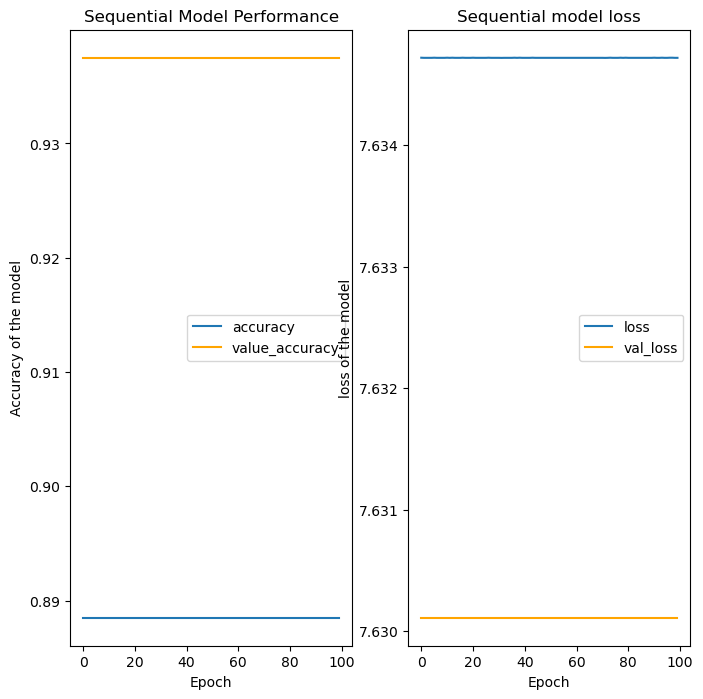

In [231]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'] , color = 'orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy of the model")
plt.legend(['accuracy' , 'value_accuracy'])
plt.title("Sequential Model Performance")

plt.subplot(1,2,2)
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'] , color = 'orange')
plt.xlabel("Epoch")
plt.ylabel("loss of the model")
plt.legend(['loss' , 'val_loss'])
plt.title("Sequential model loss")

plt.show()

# Functional Model Training

In [223]:
# creating the architecture of the functional model

input_layer = Input(shape = (6,))

hidden_layer_1 = Dense(512 , activation = 'relu')(input_layer)
hidden_layer_2 = Dense(256 , activation = 'relu')(hidden_layer_1)
hidden_layer_3 = Dense(128 , activation = 'relu')(hidden_layer_2)

output_layer = Dense(2 , activation = 'relu')(hidden_layer_3)

functional_model = Model(inputs = input_layer , outputs = output_layer)

print(functional_model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_10 (Dense)            (None, 512)               3584      
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 2)                 258       
                                                                 
Total params: 168066 (656.51 KB)
Trainable params: 168066 (656.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [224]:
# compiling the model 

functional_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [225]:
# fitting the model

model2 = functional_model.fit(x_train , y_train , epochs = 100 , verbose = 2 , validation_data = (x_test , y_test))

Epoch 1/100
9/9 - 1s - loss: 1.7739 - accuracy: 0.8850 - val_loss: 0.9641 - val_accuracy: 0.9375 - 844ms/epoch - 94ms/step
Epoch 2/100
9/9 - 0s - loss: 1.7736 - accuracy: 0.8885 - val_loss: 0.9641 - val_accuracy: 0.9375 - 67ms/epoch - 7ms/step
Epoch 3/100
9/9 - 0s - loss: 1.7736 - accuracy: 0.8885 - val_loss: 0.9641 - val_accuracy: 0.9375 - 57ms/epoch - 6ms/step
Epoch 4/100
9/9 - 0s - loss: 1.7736 - accuracy: 0.8885 - val_loss: 0.9641 - val_accuracy: 0.9375 - 61ms/epoch - 7ms/step
Epoch 5/100
9/9 - 0s - loss: 1.7736 - accuracy: 0.8885 - val_loss: 0.9641 - val_accuracy: 0.9375 - 59ms/epoch - 7ms/step
Epoch 6/100
9/9 - 0s - loss: 1.7736 - accuracy: 0.8885 - val_loss: 0.9641 - val_accuracy: 0.9375 - 58ms/epoch - 6ms/step
Epoch 7/100
9/9 - 0s - loss: 1.7736 - accuracy: 0.8885 - val_loss: 0.9641 - val_accuracy: 0.9375 - 54ms/epoch - 6ms/step
Epoch 8/100
9/9 - 0s - loss: 1.7736 - accuracy: 0.8885 - val_loss: 0.9641 - val_accuracy: 0.9375 - 53ms/epoch - 6ms/step
Epoch 9/100
9/9 - 0s - loss: 1

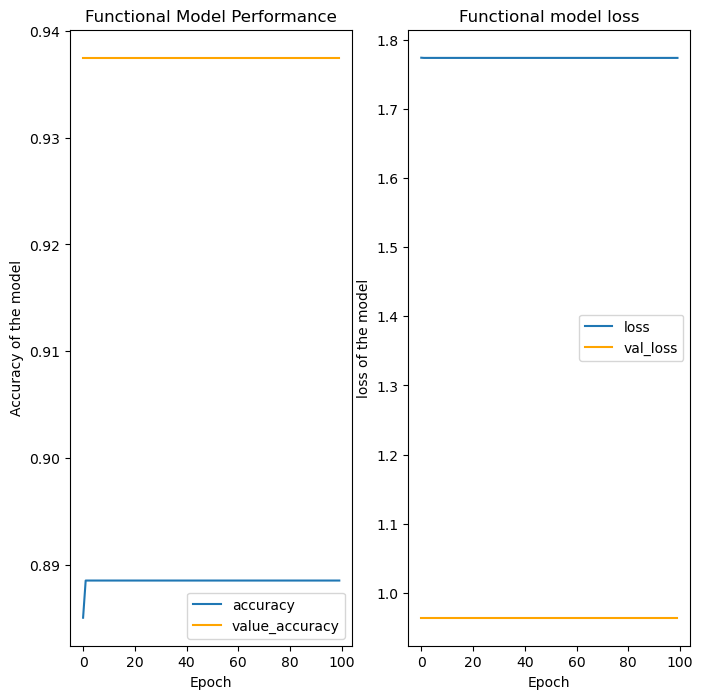

In [230]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy'] , color = 'orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy of the model")
plt.legend(['accuracy' , 'value_accuracy'])
plt.title("Functional Model Performance")

plt.subplot(1,2,2)
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss'] , color = 'orange')
plt.xlabel("Epoch")
plt.ylabel("loss of the model")
plt.legend(['loss' , 'val_loss'])
plt.title("Functional model loss")

plt.show()

In [233]:
y_pred = seq_model.predict(x_test)
y_pred2 = functional_model.predict(x_test)

1/1 [==============================] - 0s 50ms/step


accuracy of the sequential model:  0.9375




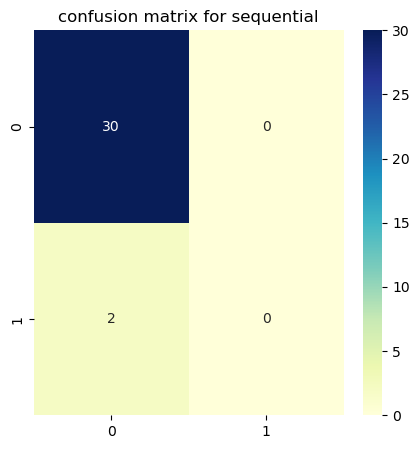

In [240]:
y_pred_seq = np.argmax(y_pred , axis = 1)
y_pred_func = np.argmax(y_pred2 , axis = 1)

acc_seq = accuracy_score(y_test , y_pred_seq)
cm1 = confusion_matrix(y_test , y_pred_seq)
print("accuracy of the sequential model: ",acc_seq)
print("\n")
plt.figure(figsize = (5,5))
sns.heatmap(cm1 , annot = True , fmt = 'd' , cmap = 'YlGnBu')
plt.title('confusion matrix for sequential')
plt.show()

accuracy of the sequential model:  0.9375




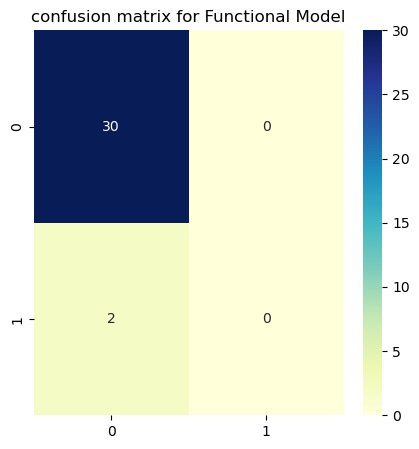

In [241]:
acc_func = accuracy_score(y_test , y_pred_func)
cm2 = confusion_matrix(y_test , y_pred_func)
print("accuracy of the sequential model: ",acc_func)
print("\n")
plt.figure(figsize = (5,5))
sns.heatmap(cm2 , annot = True , fmt = 'd' , cmap = 'YlGnBu')
plt.title('confusion matrix for Functional Model')
plt.show()

In [242]:
functional_model.save('Port_Classifier_Functional.h5')
functional_model.save('Port_Classifier_Functional.keras')
functional_model.save('Port_Classifier_Functional.caffe')

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: Port_Classifier_Functional.caffe\assets


INFO:tensorflow:Assets written to: Port_Classifier_Functional.caffe\assets


In [243]:
seq_model.save('Port_Classifier_sequential.h5')
seq_model.save('Port_Classifier_sequential.keras')
seq_model.save('Port_Classifier_sequential.caffe')

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: Port_Classifier_sequential.caffe\assets


INFO:tensorflow:Assets written to: Port_Classifier_sequential.caffe\assets
